In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure

In [33]:
class AdalineSGD(object):
   '''Adaline Stochastic-Gradient-Descent (SGD) Klassificator
      Parameter
      ---------
      eta: float 
         Lernarte (zwischen 0.0 und 1.0)
      n_iter: int
         Durchläufe der Trainingsdatenmenge
      shuffle: bool (default: True)
         Durchmischt die Trainingsdaten nach jeder Epoche, falls True, um Wiederholunten zu verhindern
      random_state: int
         Initialisierung für Zufallszahlen für allfällige Gewichte
         
      Attribute
      ---------
      w_: 1d-Array
         Gewichtungen nach Anpassungen
      cost_: list
         Summe der quadrierten Werte der Straffunktion pro Epoche
      suffle: bool
         Falls True, Durchmischung nach jeder Epoche, um Wiederholungen zu verhindern
      random_state: int (Default: None)
         Anfangswert für Zufallszahlengenerator setzen
         (Durchmischen/Initialisieren der Gewichte)
   '''
   def __init__(self, eta:float =0.01 , n_iter:int =50 , shuffle:bool =True, random_state:int =None):
      self.eta          = eta
      self.n_iter       = n_iter
      self.shuffle      = shuffle
      self.random_state = random_state
      self.w_initialized = False
      
   def fit(self, X :np.array, y :np.array) -> object:
      '''Anpassen an die Trainingsdaten
      
         Parameter
         ---------
         X: {array-like}, shape = [n_samples, n_features]
            Trainingsvektoren, n_samples ist die Anzahl der Objekte
            und n_features ist die Anzahl der Merkmale
         y: {array-like}, shape = [n_samples]
            Zielwerte
         
         Rückgabewert
         ------------
         self: object

      '''
      
      print()
      print("Initialisierung der Gewichte: ")
      self._initialize_weights(X.shape[1])
      print()
      self.cost_ = []
      
      for _ in range(self.n_iter):
         if self.shuffle:
            X, y = self._shuffle(X=X, y=y)
         cost = []
         for xi, target in zip(X, y):
            cost.append(self._update_weights(xi=xi, target=target))
         avg_cost = sum(cost)/len(y)
         self.cost_.append(avg_cost)
      return self

   def partial_fit(self, X: np.array, y: np.array) -> object:
      '''Anpassung an die Trainingsdaten ohne Reinitialisierung der Gewichte'''
      if not self.w_initialized:
         self._initialize_weights(X.shape[1])
      if y.ravel().shape[0] > 1:
         for xi, target in zip(X, y):
            self._update_weights(xi=xi, target=target)
      else:
         self._update_weights(xi=X, y=y)
      return self

   def _initialize_weights(self, m):
      '''Gewichtungen mit kleinen Zufallszahlen initialisieren'''
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + m)
      self.w_initialized = True   

   def _update_weights(self, xi, target):
      '''Adaline Lernregel zur Aktualisierung der Gewichte'''
      output = self.activation(X=self.net_input(xi))
      error = (target - output)
      self.w_[1:] += self.eta * xi.dot(error)
      self.w_[0]  += self.eta * error
      print("upgedatete Gewichte: ", self.w_)
      cost = .5 * error**2
      return cost

   def _shuffle(self, X: np.array, y: np.array) -> tuple:
      '''Trainingsdaten durchmischen'''
      r = np.random.permutation(len(y))
      return X[r], y[r]

   def net_input(self, X) -> np.array:
      '''Netzeingabe berechnen'''
      return np.dot(X, self.w_[1:]) + self.w_[0]
   
   def activation(self, X: np.array) -> np.array:
      '''lineare Aktivierungsfunktion berechnen'''
      return X

   def predict(self, X) -> np.array:
      '''Klassenbezeichnung zurückgeben'''
      return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [34]:
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
print('URL: ', s)
df = pd.read_csv('data/iris.data', header=None, encoding='utf-8')
df.head(10)

URL:  https://archive.ics.uci.edu\ml\machine-learning-databases\iris\iris.data


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [35]:
df.shape

(150, 5)

In [36]:
# Auswahl von Setosa und Versicolor (50-50)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)   # setosa = -1 /  versicolor = 1

In [37]:
# Auswahl von Kelch- und Blütenblattlänge
X = df.iloc[:100, [0,2]].values    # die beiden Features oder Merkamle extrahieren

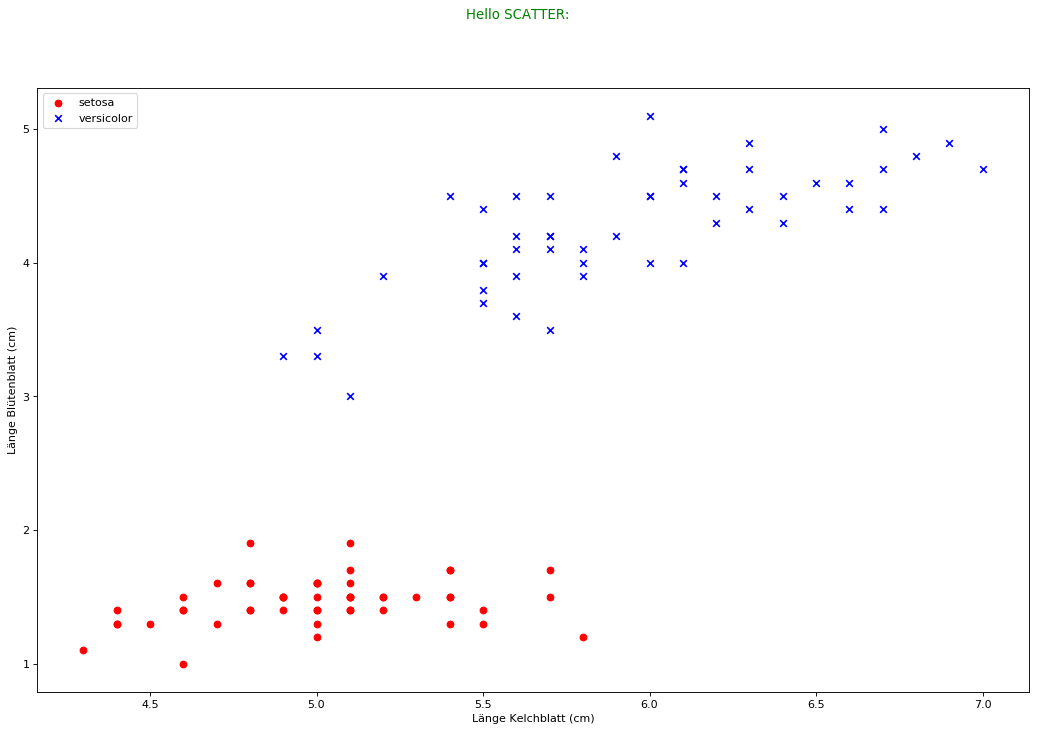

In [38]:
# Ausgbae der Diagramms
figure(figsize=(16, 10), dpi=80)
plt.scatter(X[:50, 0],  X[:50, 1], color='red',  marker='o', label='setosa')  
plt.suptitle("Hello SCATTER:", color="green")
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')   
plt.xlabel('Länge Kelchblatt (cm)')
plt.ylabel('Länge Blütenblatt (cm)')
plt.legend(loc='upper left')
plt.show()

In [39]:
# Hier standardisieren wir die Features (Merkmale) entsprechend 
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [40]:
# unseren Algorithmus erneut trainieren
ada_sgd = AdalineSGD(eta=0.01, n_iter=15, random_state=1).fit(X=X_std, y=y)


Initialisierung der Gewichte: 

upgedatete Gewichte:  [0.00592116 0.01119722 0.00590497]
upgedatete Gewichte:  [0.01564011 0.02533843 0.01560165]
upgedatete Gewichte:  [0.02474651 0.0442934  0.02784626]
upgedatete Gewichte:  [0.03334931 0.06085274 0.03702621]
upgedatete Gewichte:  [0.0238403  0.06786742 0.04667177]
upgedatete Gewichte:  [0.01524611 0.08228344 0.05598564]
upgedatete Gewichte:  [0.00597195 0.08621981 0.06474952]
upgedatete Gewichte:  [-0.00229971  0.09750379  0.07256605]
upgedatete Gewichte:  [-0.01158325  0.09853613  0.08005058]
upgedatete Gewichte:  [-0.00360101  0.10890021  0.08856834]
upgedatete Gewichte:  [-0.01310485  0.10400303  0.09952743]
upgedatete Gewichte:  [-0.00624494  0.11720752  0.10827542]
upgedatete Gewichte:  [-0.01381909  0.1263537   0.11490732]
upgedatete Gewichte:  [-0.00496446  0.12675588  0.12435601]
upgedatete Gewichte:  [0.00564234 0.11893138 0.12757933]
upgedatete Gewichte:  [0.01406352 0.12195175 0.13481265]
upgedatete Gewichte:  [0.00628746 

In [42]:
def plot_decision_regions(X, y, classifier, resolution=.01):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('hotpink', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - .3, X[:, 0].max() + .3
    x2_min, x2_max = X[:, 1].min() - .3, X[:, 1].max() + .3

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    print("Shape xx1: ", xx1.shape, "  /  Type: ", type(xx1))
    print("Shape xx2: ", xx2.shape, "  /  Type: ", type(xx2))
    print("Flatten, für die Verwendung in PREDICT Classifier: ", xx1.ravel().shape)
    print("np.array Transpose: ", np.array([xx1.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print("Z-shape: ", Z.shape, "  /  Type: ", type(Z))
    Z = Z.reshape(xx1.shape)
    print("Re-Shaped: ", Z.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

Shape xx1:  (345, 483)   /  Type:  <class 'numpy.ndarray'>
Shape xx2:  (345, 483)   /  Type:  <class 'numpy.ndarray'>
Flatten, für die Verwendung in PREDICT Classifier:  (166635,)
np.array Transpose:  [[-2.1340382]
 [-2.1240382]
 [-2.1140382]
 ...
 [ 2.6659618]
 [ 2.6759618]
 [ 2.6859618]]
Z-shape:  (166635,)   /  Type:  <class 'numpy.ndarray'>
Re-Shaped:  (345, 483)


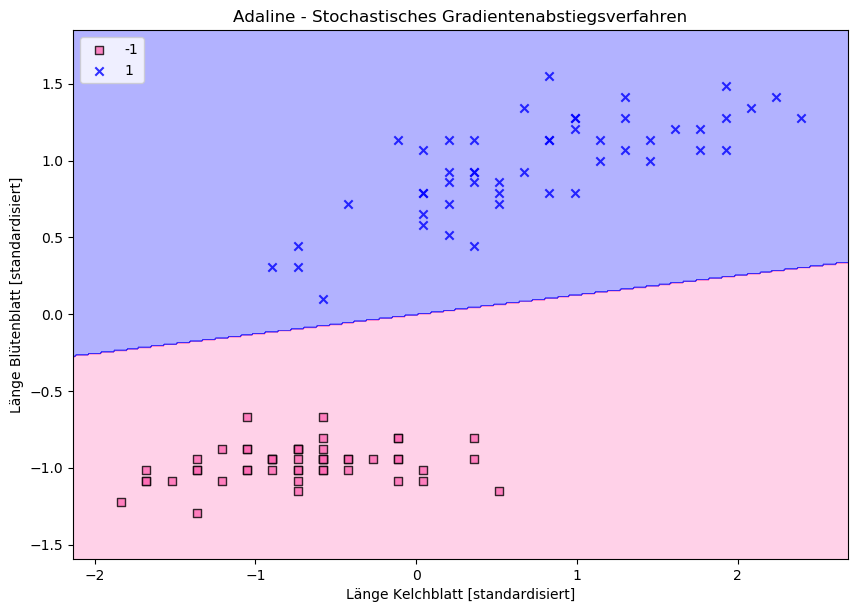

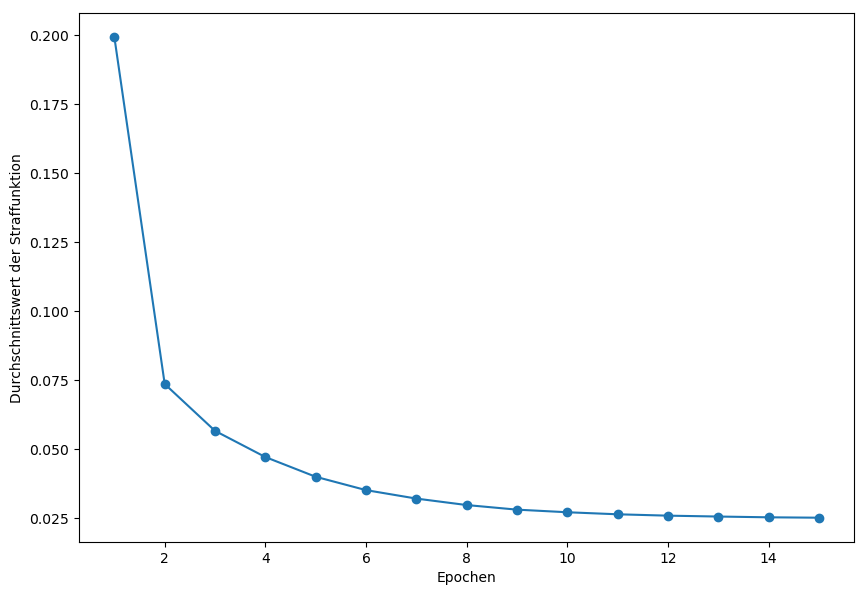

In [43]:
figure(figsize=(10, 7), dpi=100)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title("Adaline - Stochastisches Gradientenabstiegsverfahren")
plt.xlabel('Länge Kelchblatt [standardisiert]')
plt.ylabel('Länge Blütenblatt [standardisiert]')
plt.legend(loc='upper left')
plt.show()   

figure(figsize=(10, 7), dpi=100)
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel("Epochen")
plt.ylabel("Durchschnittswert der Straffunktion")
plt.show()